In [1]:
#内置图像，引入R语言
%matplotlib inline
%config InlineBackend.figure_format="svg"
%load_ext rpy2.ipython

In [3]:
%%R
library(TSA)

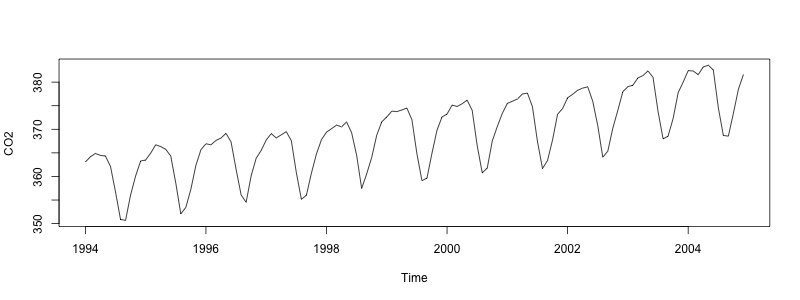

In [5]:
%%R -w 800 -h 300
#分析对象，加拿大西北地区月CO2水平
data(co2)
plot(co2,ylab='CO2')

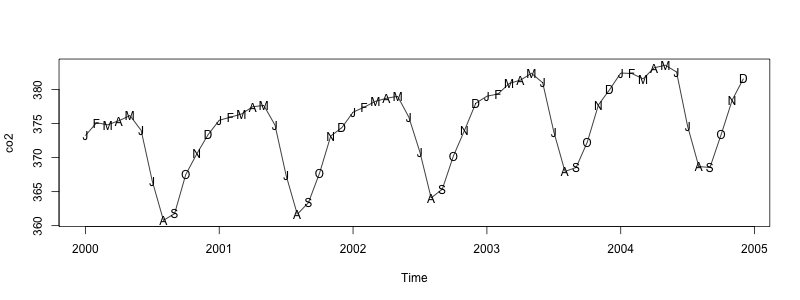

In [7]:
%%R -w 800 -h 300
plot(window(co2,start=c(2000,1)),ylab='co2')
Month = c('J','F','M','A','M','J','J','A','S','O','N','D')
points(window(co2,start=c(2000,1)),pch=Month)

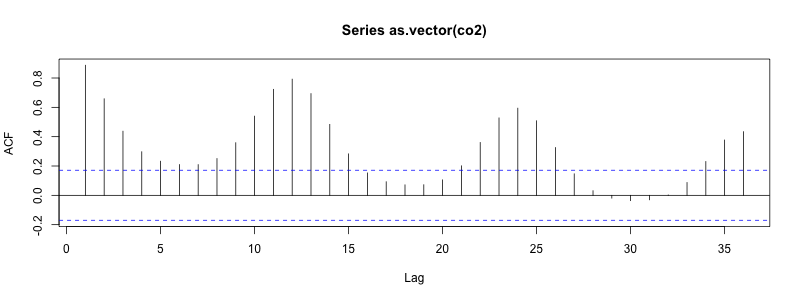

In [12]:
%%R -w 800 -h 300
#观察时间序列的自相关函数
acf(as.vector(co2),lag.max=36)

通过上图可以看出，在滞后12，24，36都有很强的相关性。

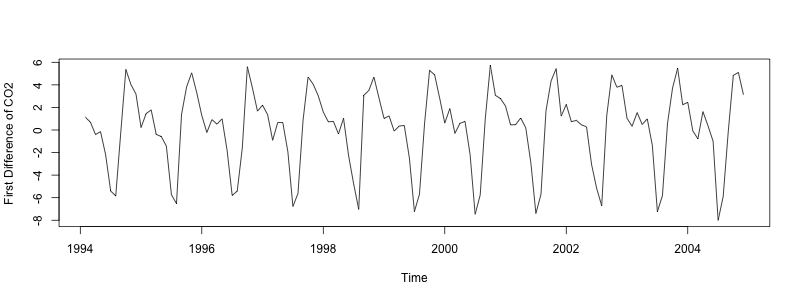

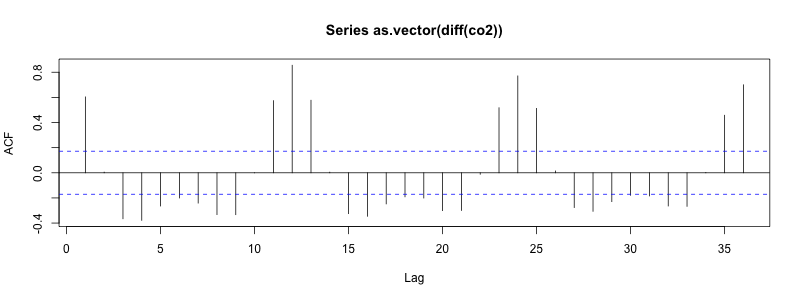

In [11]:
%%R -w 800 -h 300
plot(diff(co2),ylab='First Difference of CO2',xlab='Time')
acf(as.vector(diff(co2)),lag.max=36)

通过上图可以看出，经过一阶差分后，时间序列还是表现出季节上比较强的相关性，但是大部分的季节性都已经消失了。

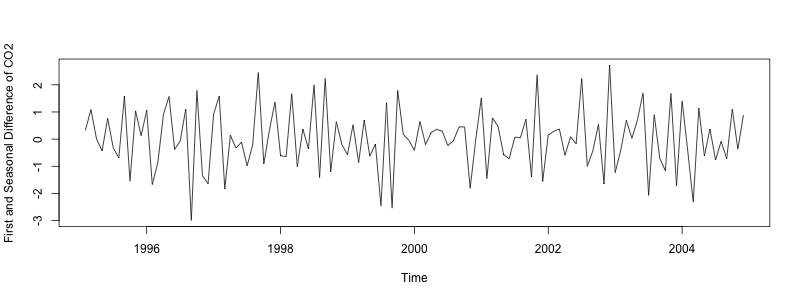

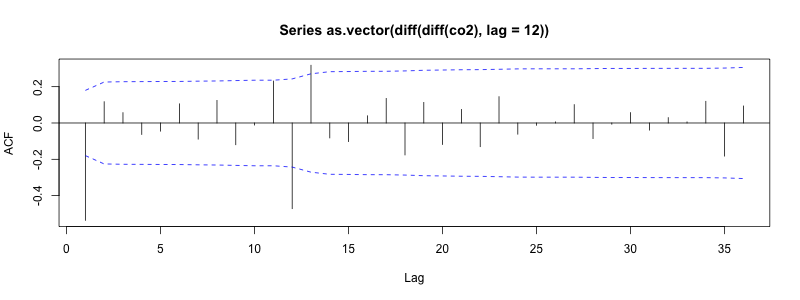

In [13]:
%%R -w 800 -h 300
plot(diff(diff(co2),lag=12),xlab='Time',ylab='First and Seasonal Difference of CO2')
acf(as.vector(diff(diff(co2),lag=12)),lag.max=36,ci.type='ma')

上图可以看出，经过两次差分后的时间序列已经几乎不再具有自相关性，我们只需建立在只有滞后1和12上具有自相关性的简单模型即可。

In [17]:
%%R
#建立ARIMA(0,1,1)*(0,1,1)^12模型
m1.co2 = arima(co2,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=12))
m1.co2


Call:
arima(x = co2, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.5792  -0.8206
s.e.   0.0791   0.1137

sigma^2 estimated as 0.5446:  log likelihood = -139.54,  aic = 283.08


从上述建模结果可以看出，所有的系数估计都是高度显著的。

## 诊断性检验

（1）观察残差图

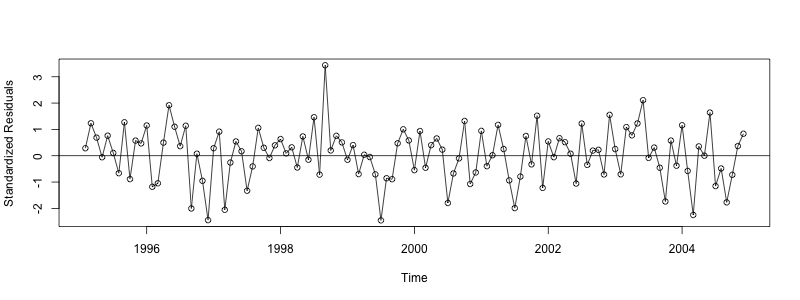

In [19]:
%%R -w 800 -h 300
plot(window(rstandard(m1.co2),start=c(1995,2)),ylab='Standardized Residuals',type = 'o')
abline(h=0)

上图给出了标准的残插图，除了序列中间存在某些异常行为外，此残差图并没有标明有任何主要的不规则性。

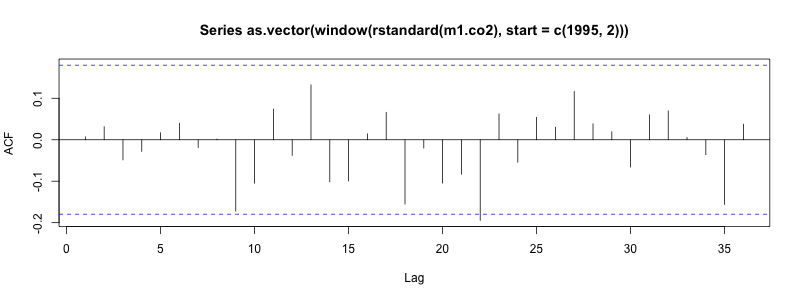

In [23]:
%%R -w 800 -h 300
acf(as.vector(window(rstandard(m1.co2),start=c(1995,2))),lag.max=36)

上图显示，在所给出的36个自相关系数中只有一个是统计显著的，此模型看来已经捕捉到依赖关系的本质。

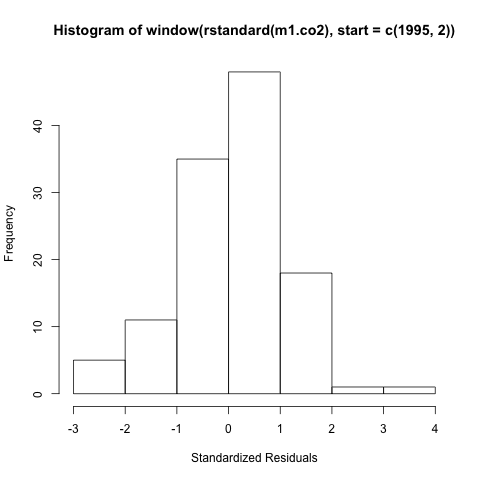

In [25]:
%%R
hist(window(rstandard(m1.co2),start=c(1995,2)),xlab='Standardized Residuals')

上图给出了残差直方图，有点像钟形

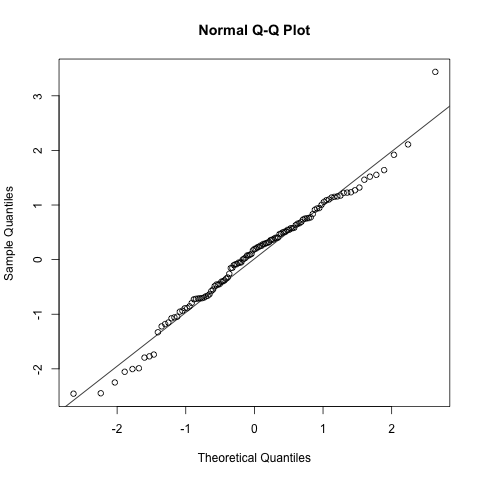

In [28]:
%%R
#QQ图
qqnorm(window(rstandard(m1.co2),start=c(1995,2)))
qqline(window(rstandard(m1.co2),start = c(1995,2)))

从上图可以看出一个异常值，但Shapiro-Willk正态性检验法给出的检验统计量W=0.982,进而得到p值为0.11，且在任何通常的显著性水平上正态性都未被拒绝。
## 预测


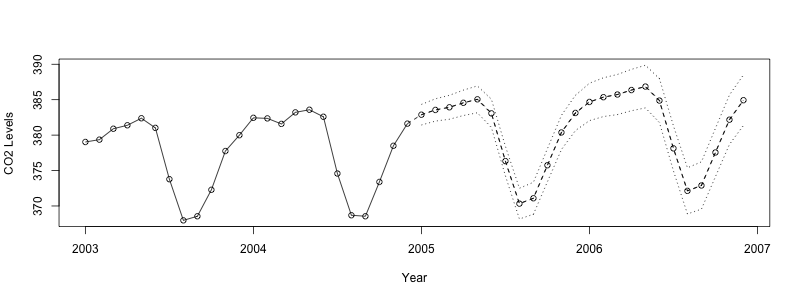

In [29]:
%%R -w 800 -h 300
plot(m1.co2,n1=c(2003,1),n.ahead=24,xlab='Year',type='o',ylab='CO2 Levels')